In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv(' BA_reviewsdataset.csv')

In [3]:
dataset

,Unnamed: 0,reviews,rate of 10
0,0,✅ Trip Verified | First time flying British Ai...,\n8/10\n
1,1,Not Verified | I flew London to Cairo and ret...,\n7/10\n
2,2,Not Verified | Absolutely the worst experienc...,\n1/10\n
3,3,Not Verified | Flew back from Malta after sc...,\n8/10\n
4,4,Not Verified | Cabin luggage had to go to carg...,\n3/10\n
...,...,...,...
995,995,✅ Trip Verified | London to Johannesburg. So ...,\n10/10\n
996,996,✅ Trip Verified | Newark to Bangalore return ...,\n7/10\n
997,997,✅ Trip Verified | London to Berlin scheduled ...,\n1/10\n
998,998,✅ Trip Verified | London to Mumbai. I have ha...,\n10/10\n


In [4]:
pprint(dataset.reviews)

Pretty printing has been turned OFF


In [5]:
df=pd.DataFrame({'Reviews':dataset['reviews'], 'Rating':dataset['rate of 10']
})

In [6]:
df

,Reviews,Rating
0,✅ Trip Verified | First time flying British Ai...,\n8/10\n
1,Not Verified | I flew London to Cairo and ret...,\n7/10\n
2,Not Verified | Absolutely the worst experienc...,\n1/10\n
3,Not Verified | Flew back from Malta after sc...,\n8/10\n
4,Not Verified | Cabin luggage had to go to carg...,\n3/10\n
...,...,...
995,✅ Trip Verified | London to Johannesburg. So ...,\n10/10\n
996,✅ Trip Verified | Newark to Bangalore return ...,\n7/10\n
997,✅ Trip Verified | London to Berlin scheduled ...,\n1/10\n
998,✅ Trip Verified | London to Mumbai. I have ha...,\n10/10\n


In [7]:
# Function to remove words before the pipe symbol
def remove_word_before_pipe(text):
    if '|' in text:
        return text.split('|')[-1].strip()
    else:
        return text

# Apply the function to the 'Review' column
df['Reviews'] = df['Reviews'].apply(remove_word_before_pipe)

# Display the modified DataFrame
print(df)


                                               Reviews     Rating
0    First time flying British Airways and I would ...   \n8/10\n
1    I flew London to Cairo and return in October 2...   \n7/10\n
2    Absolutely the worst experience ever.  Flew in...   \n1/10\n
3    Flew back from Malta after scattering our son'...   \n8/10\n
4    Cabin luggage had to go to cargo, even when I ...   \n3/10\n
..                                                 ...        ...
995  London to Johannesburg. So impressed by the la...  \n10/10\n
996  Newark to Bangalore return via London on BA pr...   \n7/10\n
997  London to Berlin scheduled for 21st December. ...   \n1/10\n
998  London to Mumbai. I have had my battles with t...  \n10/10\n
999  Athens to Los Angeles via London. Worst flight...   \n2/10\n

[1000 rows x 2 columns]


In [8]:
df

,Reviews,Rating
0,First time flying British Airways and I would ...,\n8/10\n
1,I flew London to Cairo and return in October 2...,\n7/10\n
2,Absolutely the worst experience ever. Flew in...,\n1/10\n
3,Flew back from Malta after scattering our son'...,\n8/10\n
4,"Cabin luggage had to go to cargo, even when I ...",\n3/10\n
...,...,...
995,London to Johannesburg. So impressed by the la...,\n10/10\n
996,Newark to Bangalore return via London on BA pr...,\n7/10\n
997,London to Berlin scheduled for 21st December. ...,\n1/10\n
998,London to Mumbai. I have had my battles with t...,\n10/10\n


In [10]:
# Remove '\n' characters from the beginning and end of each string in the 'Rating' column
df['Rating'] = df['Rating'].str.strip('\n').str.strip()

# Extract the numerator from the 'Rating' column
df['Rating'] = df['Rating'].str.split('/').str[0]

# Convert the 'Rating' column to numeric type
df['Rating'] = pd.to_numeric(df['Rating'])

In [11]:
df

,Reviews,Rating
0,First time flying British Airways and I would ...,8
1,I flew London to Cairo and return in October 2...,7
2,Absolutely the worst experience ever. Flew in...,1
3,Flew back from Malta after scattering our son'...,8
4,"Cabin luggage had to go to cargo, even when I ...",3
...,...,...
995,London to Johannesburg. So impressed by the la...,10
996,Newark to Bangalore return via London on BA pr...,7
997,London to Berlin scheduled for 21st December. ...,1
998,London to Mumbai. I have had my battles with t...,10


In [64]:
def Setiment(i):
    if i>5 :
        return "Positive"
  
    else:
        return "Negative"

# Apply the function to the 'Review' column
df['Setiment'] = df['Rating'].apply(Setiment)

print(df)

                                               Reviews  Rating  Setiment  \
0    First time flying British Airways and I would ...       8  Positive   
1    I flew London to Cairo and return in October 2...       7  Positive   
2    Absolutely the worst experience ever.  Flew in...       1  Negative   
3    Flew back from Malta after scattering our son'...       8  Positive   
4    Cabin luggage had to go to cargo, even when I ...       3  Negative   
..                                                 ...     ...       ...   
995  London to Johannesburg. So impressed by the la...      10  Positive   
996  Newark to Bangalore return via London on BA pr...       7  Positive   
997  London to Berlin scheduled for 21st December. ...       1  Negative   
998  London to Mumbai. I have had my battles with t...      10  Positive   
999  Athens to Los Angeles via London. Worst flight...       2  Negative   

                                         Clean_Reviews  \
0    [time, fly, british, air

In [65]:
%%capture
!pip install -U gensim

In [66]:
#data cleaning
from gensim.utils import tokenize #breaking the texts into individual words or tokens.
from gensim.parsing.preprocessing import preprocess_string,strip_tags,strip_punctuation,strip_numeric,remove_stopwords,strip_short
#applying a series of text preprocessing steps(remove HTML tags, punctuatioins, numeric characters, stopwords and short words) )
from gensim.corpora.dictionary import Dictionary
#create and manage a mapping between words and their integer IDs.
from gensim import models
#topic modeling

In [67]:
help(preprocess_string)

Help on function preprocess_string in module gensim.parsing.preprocessing:

preprocess_string(s, filters=[<function <lambda> at 0x7fb49519e430>, <function strip_tags at 0x7fb495198e50>, <function strip_punctuation at 0x7fb495198dc0>, <function strip_multiple_whitespaces at 0x7fb49519e160>, <function strip_numeric at 0x7fb49519e040>, <function remove_stopwords at 0x7fb495198ca0>, <function strip_short at 0x7fb495198ee0>, <function stem_text at 0x7fb49519e280>])
    Apply list of chosen filters to `s`.
    
    Default list of filters:
    
    * :func:`~gensim.parsing.preprocessing.strip_tags`,
    * :func:`~gensim.parsing.preprocessing.strip_punctuation`,
    * :func:`~gensim.parsing.preprocessing.strip_multiple_whitespaces`,
    * :func:`~gensim.parsing.preprocessing.strip_numeric`,
    * :func:`~gensim.parsing.preprocessing.remove_stopwords`,
    * :func:`~gensim.parsing.preprocessing.strip_short`,
    * :func:`~gensim.parsing.preprocessing.stem_text`.
    
    Parameters
    -------

In [68]:
df['Clean_Reviews'] = df['Reviews'].apply(preprocess_string)

In [69]:
df

,Reviews,Rating,Setiment,Clean_Reviews,Clean_Reviews1
0,First time flying British Airways and I would ...,8,Positive,"[time, fly, british, airwai, hesit, fly, econo...","[time, flying, british, airways, hesitate, fly..."
1,I flew London to Cairo and return in October 2...,7,Positive,"[flew, london, cairo, return, octob, basic, pe...","[flew, london, cairo, return, october, basical..."
2,Absolutely the worst experience ever. Flew in...,1,Negative,"[absolut, worst, experi, flew, heathrow, probl...","[absolutely, worst, experience, flew, heathrow..."
3,Flew back from Malta after scattering our son'...,8,Positive,"[flew, malta, scatter, son, ash, favourit, spo...","[flew, malta, scattering, son, ashes, favourit..."
4,"Cabin luggage had to go to cargo, even when I ...",3,Negative,"[cabin, luggag, cargo, said, carri, medicin, t...","[cabin, luggage, cargo, said, carried, medicin..."
...,...,...,...,...,...
995,London to Johannesburg. So impressed by the la...,10,Positive,"[london, johannesburg, impress, ladi, check, w...","[london, johannesburg, impressed, lady, checke..."
996,Newark to Bangalore return via London on BA pr...,7,Positive,"[newark, bangalor, return, london, premium, ec...","[newark, bangalore, return, london, premium, e..."
997,London to Berlin scheduled for 21st December. ...,1,Negative,"[london, berlin, schedul, decemb, approach, ai...","[london, berlin, scheduled, december, approach..."
998,London to Mumbai. I have had my battles with t...,10,Positive,"[london, mumbai, battl, leadership, let, book,...","[london, mumbai, battles, leadership, let, boo..."


In [70]:
filters=[lambda x: x.lower(),strip_tags,strip_punctuation,strip_numeric,remove_stopwords,strip_short]
df['Clean_Reviews1'] = df['Reviews'].apply(lambda x: preprocess_string(x,filters))

In [71]:
df

,Reviews,Rating,Setiment,Clean_Reviews,Clean_Reviews1
0,First time flying British Airways and I would ...,8,Positive,"[time, fly, british, airwai, hesit, fly, econo...","[time, flying, british, airways, hesitate, fly..."
1,I flew London to Cairo and return in October 2...,7,Positive,"[flew, london, cairo, return, octob, basic, pe...","[flew, london, cairo, return, october, basical..."
2,Absolutely the worst experience ever. Flew in...,1,Negative,"[absolut, worst, experi, flew, heathrow, probl...","[absolutely, worst, experience, flew, heathrow..."
3,Flew back from Malta after scattering our son'...,8,Positive,"[flew, malta, scatter, son, ash, favourit, spo...","[flew, malta, scattering, son, ashes, favourit..."
4,"Cabin luggage had to go to cargo, even when I ...",3,Negative,"[cabin, luggag, cargo, said, carri, medicin, t...","[cabin, luggage, cargo, said, carried, medicin..."
...,...,...,...,...,...
995,London to Johannesburg. So impressed by the la...,10,Positive,"[london, johannesburg, impress, ladi, check, w...","[london, johannesburg, impressed, lady, checke..."
996,Newark to Bangalore return via London on BA pr...,7,Positive,"[newark, bangalor, return, london, premium, ec...","[newark, bangalore, return, london, premium, e..."
997,London to Berlin scheduled for 21st December. ...,1,Negative,"[london, berlin, schedul, decemb, approach, ai...","[london, berlin, scheduled, december, approach..."
998,London to Mumbai. I have had my battles with t...,10,Positive,"[london, mumbai, battl, leadership, let, book,...","[london, mumbai, battles, leadership, let, boo..."


In [72]:
df_dictionary = Dictionary(df['Clean_Reviews1'])

In [73]:
df['Clean_Reviews1'].to_csv('cleaned_data final.csv',index=False)

df_dictionary represents mapping between the words in Reviews column and unique integers identifiers.
that each word is assigned to a unique ID that can enable us to convert the text data into a numerical representation
suitable for NLP tasks for example we can see the frequency of the words which is required in our case. 

In [74]:
len(df_dictionary) #return the number of unique words (tokens) in my dictionary 

6942

In [75]:
print(df_dictionary.token2id)

{'airways': 0, 'attendants': 1, 'better': 2, 'british': 3, 'comfortable': 4, 'economy': 5, 'efficient': 6, 'excellent': 7, 'flight': 8, 'flights': 9, 'fly': 10, 'flying': 11, 'hesitate': 12, 'low': 13, 'meal': 14, 'pleasant': 15, 'sodium': 16, 'space': 17, 'special': 18, 'time': 19, 'bag': 20, 'basically': 21, 'box': 22, 'cabin': 23, 'cairo': 24, 'checked': 25, 'content': 26, 'crew': 27, 'drinks': 28, 'entertainment': 29, 'enthusiastically': 30, 'especially': 31, 'flew': 32, 'getting': 33, 'good': 34, 'hour': 35, 'hours': 36, 'included': 37, 'journey': 38, 'leg': 39, 'legroom': 40, 'little': 41, 'london': 42, 'money': 43, 'nearly': 44, 'numbing': 45, 'october': 46, 'overall': 47, 'pair': 48, 'pass': 49, 'perfectly': 50, 'plane': 51, 'poor': 52, 'priced': 53, 'problem': 54, 'professional': 55, 'reading': 56, 'recommend': 57, 'return': 58, 'said': 59, 'seat': 60, 'sensibly': 61, 'sleeping': 62, 'snack': 63, 'surprising': 64, 'tall': 65, 'ticket': 66, 'value': 67, 'welcome': 68, 'absolute

In [76]:
vec_df = [df_dictionary.doc2bow(text) for text in df['Clean_Reviews1']] #create a dataset corpus with bag of word vectorization

This method returns a list of tuples where each tuple represents a word's ID and its frequency in the document.

In [77]:
print(vec_df[1]) #sample of the vectorized text 

[(5, 1), (8, 1), (9, 2), (15, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)]


In [78]:
vec_df #shows how frequently the words appear in each text. 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(5, 1), (8, 1), (9, 2), (15, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(0, 1), (3, 1), (8, 8), (9, 1), (10, 1), (32, 1), (36, 7), (54, 1), (58, 6), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 3), (76, 1), (77, 1), (78, 3), (79, 2), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 3), (97, 1), (98

In [79]:
len(vec_df)

1000

In [80]:
#anotehr vectorization method
tfidf = models.TfidfModel(vec_df)
df_tfidf = tfidf[vec_df]

now we're creating a TF-IDF (Term Frequency-Inverse Document Frequency) 
which reflects the importance of a word in a document relative to a collection of documents (corpus).
so we will transform our original bag-of-words representations into TF-IDF vectors.
Each element in the resulting vectors will represent the TF-IDF weight of a word in the corresponding document.



In [81]:
len(df_tfidf)

1000

In [82]:
print(df_tfidf[1]) #sample of the vectorized text 

[(5, 0.06605480246656456), (8, 0.009886638060524894), (9, 0.12029043114416686), (15, 0.10772321384951997), (19, 0.03832642701683686), (20, 0.08765997547221932), (21, 0.1632342622179602), (22, 0.16028012260604266), (23, 0.04971650434239493), (24, 0.17385175668522088), (25, 0.10911609773740161), (26, 0.20378079261934057), (27, 0.04394623328169342), (28, 0.07704248100495865), (29, 0.08572722800640396), (30, 0.25494481748798165), (31, 0.11973359220466227), (32, 0.08765997547221932), (33, 0.09867646887933144), (34, 0.10057743602683479), (35, 0.060523752659398265), (36, 0.05251718409714443), (37, 0.15499869369159458), (38, 0.10572775261759516), (39, 0.0971057193822593), (40, 0.11284725641682611), (41, 0.1038346688229535), (42, 0.029717428230682904), (43, 0.09185847948598092), (44, 0.13765224978363966), (45, 0.2293628050536611), (46, 0.15261676775069954), (47, 0.0896995575013591), (48, 0.19554522409297495), (49, 0.13066788726493528), (50, 0.17385175668522088), (51, 0.06561542772410368), (52, 

(5, 0.06605480246656456): The word with ID 5 has a TF-IDF weight of approximately 0.066 in this document.
the TF-IDF weight reflects how important a word is in a document relative to the entire corpus. Words with higher TF-IDF weights are considered more unique or informative to the specific document.
Higher TF indicates that a word is frequent in the document, and lower IDF indicates that the word is not common across many documents.

# Topic Modelling with Latent Dirichlet Allocation(LDA)

In [83]:
from gensim.models.ldamodel import LdaModel

In [84]:
lda_df = LdaModel(vec_df,num_topics=20,id2word=df_dictionary,random_state=0)

In [85]:
lda_topics_bow = lda_df.print_topics(num_words=8)#This will show you the top 8 words for each of the 20 topics identified by the LDA model.


In [86]:
for topic in lda_topics_bow:
    print(topic) #give me the top 8 words in each topic. 

(0, '0.025*"flight" + 0.011*"airways" + 0.010*"service" + 0.009*"seat" + 0.009*"british" + 0.007*"check" + 0.006*"customer" + 0.006*"bag"')
(1, '0.016*"flight" + 0.007*"hours" + 0.007*"time" + 0.007*"cabin" + 0.006*"good" + 0.006*"seats" + 0.006*"check" + 0.006*"london"')
(2, '0.022*"flight" + 0.012*"staff" + 0.009*"food" + 0.008*"business" + 0.008*"service" + 0.007*"good" + 0.007*"class" + 0.007*"british"')
(3, '0.020*"flight" + 0.013*"seat" + 0.009*"london" + 0.008*"service" + 0.008*"check" + 0.007*"food" + 0.007*"time" + 0.007*"british"')
(4, '0.014*"airways" + 0.013*"flight" + 0.013*"british" + 0.011*"class" + 0.009*"seat" + 0.009*"business" + 0.007*"seats" + 0.007*"hours"')
(5, '0.045*"flight" + 0.012*"service" + 0.010*"staff" + 0.008*"british" + 0.007*"time" + 0.007*"check" + 0.007*"airways" + 0.006*"airport"')
(6, '0.021*"flight" + 0.014*"time" + 0.010*"food" + 0.009*"economy" + 0.007*"check" + 0.007*"hours" + 0.007*"service" + 0.006*"airways"')
(7, '0.034*"flight" + 0.011*"serv

In [87]:
lda_tfidf = LdaModel(df_tfidf, id2word=df_dictionary, num_topics=20)

In [88]:
lda_topics_tfidf = lda_tfidf.print_topics(num_words=8)
for topic in lda_topics_tfidf:
  print(topic) #this will give me the keywords of every topic. 

(0, '0.002*"staff" + 0.002*"experience" + 0.002*"seat" + 0.002*"heathrow" + 0.002*"good" + 0.002*"seats" + 0.002*"told" + 0.002*"class"')
(1, '0.003*"good" + 0.002*"seat" + 0.002*"luggage" + 0.002*"london" + 0.002*"time" + 0.002*"return" + 0.002*"class" + 0.002*"business"')
(2, '0.002*"business" + 0.002*"class" + 0.002*"luggage" + 0.002*"seats" + 0.002*"home" + 0.002*"economy" + 0.002*"airways" + 0.002*"club"')
(3, '0.002*"refund" + 0.002*"service" + 0.002*"high" + 0.002*"new" + 0.001*"customer" + 0.001*"class" + 0.001*"british" + 0.001*"covid"')
(4, '0.002*"good" + 0.002*"crew" + 0.002*"food" + 0.002*"experience" + 0.002*"time" + 0.002*"cabin" + 0.002*"boarding" + 0.002*"staff"')
(5, '0.002*"economy" + 0.002*"app" + 0.002*"seat" + 0.002*"seats" + 0.002*"airline" + 0.002*"service" + 0.001*"pay" + 0.001*"check"')
(6, '0.002*"hours" + 0.002*"economy" + 0.001*"early" + 0.001*"days" + 0.001*"booked" + 0.001*"card" + 0.001*"ticket" + 0.001*"fly"')
(7, '0.002*"luggage" + 0.002*"british" + 0.

the model lda_df is trained using the bag of words representation of the document vec_df.
so each vector in vec_df represents a document in terms of count of words. 
the model (lda_tfidf) is trained using the Term Frequency-Inverse Document Frequency (TF-IDF) representation of the documents (df_tfidf). 
TF-IDF takes into account the importance of words in a document relative to their importance in the entire corpus (common words and informative words). The topic modeling algorithm is applied to the vectorized data to identify topics. Each document is then represented as a mixture of topics.

# Topic Modelling with Latent Semantic Analysis/Indexing(LSA/LSI)


In [89]:
from gensim.models.lsimodel import LsiModel

In [90]:
lsi_bow = LsiModel(corpus=vec_df,id2word=df_dictionary,num_topics=20)

/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [91]:
lsi_topics_bow = lsi_bow.print_topics(num_words=8)
for topic in lsi_topics_bow:
  print(topic)

(0, '-0.664*"flight" + -0.201*"service" + -0.151*"london" + -0.147*"time" + -0.130*"seat" + -0.126*"british" + -0.123*"airways" + -0.114*"class"')
(1, '-0.394*"flight" + 0.282*"seat" + 0.273*"class" + 0.255*"seats" + 0.245*"business" + 0.218*"good" + 0.212*"economy" + 0.206*"cabin"')
(2, '-0.399*"flight" + 0.375*"british" + 0.365*"airways" + 0.235*"class" + 0.218*"business" + 0.188*"customer" + -0.175*"good" + -0.149*"crew"')
(3, '-0.345*"flight" + 0.343*"staff" + 0.255*"luggage" + -0.241*"seat" + 0.230*"airport" + -0.225*"class" + -0.201*"business" + 0.180*"time"')
(4, '-0.359*"economy" + 0.310*"good" + 0.288*"service" + 0.264*"british" + 0.263*"airways" + -0.245*"seats" + -0.243*"seat" + -0.184*"premium"')
(5, '-0.483*"class" + -0.469*"business" + 0.264*"seat" + 0.234*"economy" + 0.216*"service" + -0.173*"staff" + 0.164*"premium" + 0.149*"customer"')
(6, '-0.518*"service" + 0.367*"airways" + 0.364*"british" + -0.267*"customer" + 0.186*"london" + 0.162*"time" + 0.155*"luggage" + -0.12

In [92]:
lsi_tfidf = LsiModel(df_tfidf, id2word=df_dictionary, num_topics=20)

/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [93]:
lsi_topics_tfidf = lsi_tfidf.print_topics(num_words=8)
for topic in lsi_topics_tfidf:
  print(topic)

(0, '-0.132*"good" + -0.132*"class" + -0.122*"business" + -0.120*"seat" + -0.119*"seats" + -0.112*"service" + -0.110*"economy" + -0.108*"food"')
(1, '-0.200*"good" + 0.162*"refund" + 0.160*"cancelled" + 0.144*"customer" + 0.131*"told" + -0.127*"economy" + 0.123*"booked" + -0.120*"crew"')
(2, '-0.290*"class" + -0.271*"business" + -0.260*"economy" + -0.217*"premium" + -0.174*"seats" + -0.158*"seat" + 0.136*"good" + 0.125*"fine"')
(3, '-0.214*"refund" + 0.210*"luggage" + -0.205*"voucher" + -0.183*"good" + -0.151*"cancelled" + -0.148*"great" + 0.147*"bags" + 0.142*"bag"')
(4, '0.248*"business" + 0.230*"class" + -0.212*"premium" + 0.209*"lounge" + -0.176*"economy" + -0.169*"great" + -0.149*"amazing" + 0.131*"club"')
(5, '0.300*"economy" + -0.272*"class" + 0.270*"premium" + -0.219*"business" + -0.186*"worst" + -0.166*"delayed" + 0.140*"bag" + -0.139*"airways"')
(6, '0.217*"great" + -0.178*"delayed" + -0.169*"premium" + -0.166*"cancelled" + 0.152*"thank" + 0.148*"class" + 0.147*"business" + -

# Topic Modelling Visualization with pyLDAvis

In [94]:
%%capture
!pip install pyLDAvis

In [95]:
import pyLDAvis
import pyLDAvis.gensim_models

In [96]:
pyLDAvis.enable_notebook()

In [97]:
vis_tfidf = pyLDAvis.gensim_models.prepare(lda_tfidf, df_tfidf, df_dictionary, n_jobs=1)


In [98]:
pyLDAvis.display(vis_tfidf)

Topics that are more similar are positioned closer together, while less similar topics are farther apart.
Topics that cluster together may share common themes or frequently co-occur in documents.

In [99]:
vis_bow = pyLDAvis.gensim_models.prepare(lda_df, vec_df, df_dictionary, n_jobs=1)
vis_bow

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.029227  0.007650       1        1  12.935155
7      0.041650  0.006164       2        1  12.600142
12     0.008786 -0.003924       3        1  11.009351
17     0.018376  0.003651       4        1   9.832656
8      0.014837  0.022925       5        1   6.452006
3     -0.004686 -0.000828       6        1   4.814590
10     0.047036 -0.007962       7        1   4.481502
6     -0.016662  0.008495       8        1   4.472912
18     0.016147  0.009672       9        1   4.027291
13     0.001691  0.004221      10        1   3.948467
19    -0.015027  0.037122      11        1   3.335480
15     0.003868  0.011843      12        1   3.331429
14    -0.039233  0.014254      13        1   2.960242
0      0.037729 -0.021222      14        1   2.882554
2      0.017759  0.002058      15        1   2.553186
4      0.004981 -0.108468      16        1   2.384592
9      0.002316  0.027861      17        1   2.267928
11    -0.062304 -0.007394      18        1   2.067825
1     -0.013727  0.009853      19        1   1.937575
16    -0.092766 -0.015970      20        1   1.705116, topic_info=          Term         Freq        Total Category  logprob  loglift
8       flight  1763.000000  1763.000000  Default  30.0000  30.0000
34        good   353.000000   353.000000  Default  29.0000  29.0000
147      seats   373.000000   373.000000  Default  28.0000  28.0000
60        seat   411.000000   411.000000  Default  27.0000  27.0000
177       food   391.000000   391.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
164      short     2.955718    79.691483  Topic20  -5.8936   0.7771
9      flights     3.763187   241.460825  Topic20  -5.6521  -0.0899
847  departure     2.958195   100.092324  Topic20  -5.8928   0.5500
35        hour     3.099277   221.723210  Topic20  -5.8462  -0.1987
115    service     3.291693   659.429566  Topic20  -5.7859  -1.2284

[1553 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1806      1  0.066338    accepted
1806      2  0.199015    accepted
1806      3  0.066338    accepted
1806      4  0.331691    accepted
1806      5  0.066338    accepted
...     ...       ...         ...
1179      8  0.595795    “because
2400     18  0.440197   “business
2131      3  0.529785       “call
2728      4  0.550220       “new”
1683      5  0.560854  “searching

[4736 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 13, 18, 9, 4, 11, 7, 19, 14, 20, 16, 15, 1, 3, 5, 10, 12, 2, 17])

If a certain topic has a high probability in the marginal distribution, it suggests that this topic is frequently discussed or represented across multiple documents in the corpus.
On the other hand, if a topic has a low probability in the marginal distribution, it may indicate that this topic is less common or concentrated in specific subsets of documents

if we hover between the topics to list th words in terms of frequency so we notice flight appears in the top of the list. if we try to decrease lamda to put more weight to essentialy the ratio of red to blue
or the ratio of  the frequency given the topic to the overall frequency of words. starting from the topics that are clusterred near each other,
its expected that they are symmetric or related.
topic 1 talks about a delay and a cancellation of the flight.
the second topic is about helping with baggage and bags loss appearently.
the third topic was about a business class,it had old seats yet it was comfortable and family friendly and food was good.
in the forth topic it was commented on the luggage, crew, cabin, staff, boarding and seats. 
in the fifth topic talks about a good service, seat, food, crew and timing. 
int topic 18 talks about business class services
in topic 19 talks about bad service of ruining a suitecase and high prices

/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orie

/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/olasuaifan/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTAT

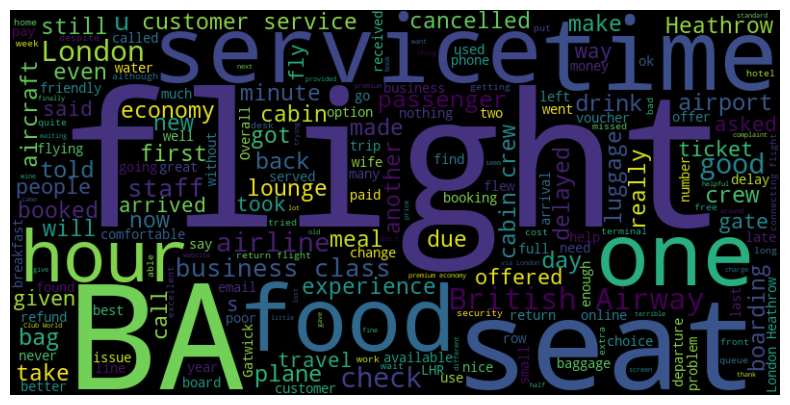

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['Reviews']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [101]:
Positive_Sentiment_Count = df['Setiment'].value_counts().get("Positive", 0)
print("Percentage of Positive Setiments",(Positive_Sentiment_Count/1000) )

Percentage of Positive Setiments 0.329


In [102]:
Negative_Sentiment_Count = df['Setiment'].value_counts().get("Negative", 0)
print("Percentage of Negative Setiments",(Negative_Sentiment_Count/1000) )

Percentage of Negative Setiments 0.671


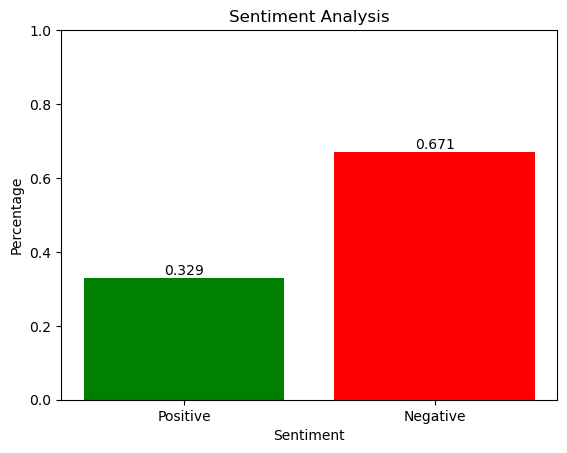

In [105]:
import matplotlib.pyplot as plt

# Assuming you have calculated the percentages as mentioned in your code
positive_percentage = Positive_Sentiment_Count / 1000
negative_percentage = Negative_Sentiment_Count / 1000
neutral_percentage = Neutral_Sentiment_Count / 1000

# Bar plot
sentiments = ['Positive', 'Negative']
percentages = [positive_percentage, negative_percentage]

fig, ax = plt.subplots()
bars = ax.bar(sentiments, percentages, color=['green', 'red'])

# Annotate the bars with the percentage values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis')
plt.ylim(0, 1)  # Set y-axis limits to 0-100% for percentage values
plt.show()
